## Load necessary modules

In [2]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import csv
import os
import numpy as np
import time

# set tf backend to allow memory to grow, instead of claiming everything
import tensorflow as tf

def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    return tf.Session(config=config)

# use this environment flag to change which GPU to use
#os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# set the modified tf session as backend in keras
keras.backend.tensorflow_backend.set_session(get_session())

Using TensorFlow backend.


## Load RetinaNet model

In [15]:
base_dir = '..'
model_path = os.path.join(base_dir, 'models', 'resnet50_csv_06_converted.h5')
model = models.load_model(model_path, backbone_name='resnet50')
#model = models.convert_model(model)

In [4]:
food_dict = {'かぼちゃ': 'Pumpkin',
             'キャベツ': 'Cabbage',
             'きゅうり': 'Cucumber',
             'じゃがいも': 'Potato',
             'トマト': 'Tomato',
             'にんじん': 'Carrot',
             'ピーマン': 'Bell pepper',
             'ブロッコリー': 'Broccoli',
             '牛乳': 'Milk',
             '大根': 'Radish',
             '卵': 'Egg',
             'きのこ': 'Mushroom',
             'レモン': 'Lemon',
             'チーズ': 'Cheese'}

classes = os.path.join(base_dir, 'labels', 'classes.csv')
labels_to_names = {}
with open(classes) as f:
    reader = csv.reader(f)
    for row in reader:
        labels_to_names[row[1]] = food_dict[row[0]]

## Run detection on example

processing time:  5.5417799949646
Pumpkin 0.778
Bell pepper 0.762
Potato 0.520


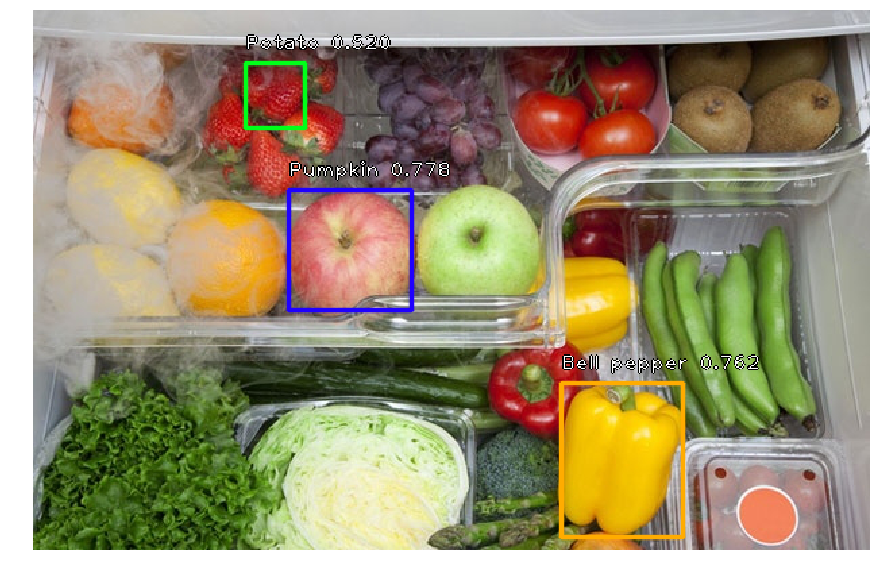

In [18]:
# load image
image = read_image_bgr(os.path.join(base_dir, 'images/input/fruits_vegetables.jpg'))

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.5:
        break
        
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    
    caption = "{} {:.3f}".format(labels_to_names[str(label)], score)
    draw_caption(draw, b, caption)
    print(caption)
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()